### 비지도학습 와인품질 분류

In [19]:
# 데이터 처리 및 시각화를 위한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝용 라이브러리
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

In [20]:
# 1. 데이터 준비 및 전처리

# Red Wine Quality Dataset 로드
df = pd.read_csv('winequality-red.csv')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
# 왕니의 화학적 특성
# quality 를 제외한 나머지 컬럼들
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol']

x = df[features]

# 표준 정규화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


# 정규화된 데이터를 DataFrame으로 변환
x_scaled_df = pd.DataFrame(x_scaled, columns=features)
x_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [22]:
# kmeans 클러스터링

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

In [23]:
# 각 데이터 포인트의 클러스터 레이블이 프레임에 추가되었는지 확인
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [24]:
# 클러스터별 평균값 계산
cluster_means = df.groupby('Cluster')[features + ['quality']].mean()
cluster_means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Cluster,,,,,,,,,,,,
0,7.189889,0.609342,0.123047,2.214058,0.078553,13.507618,34.894737,0.995896,3.405762,0.609224,10.494044,5.552632
1,10.067131,0.405080,0.469761,2.582570,0.100460,10.888446,30.627490,0.997574,3.195040,0.752131,10.724037,5.960159
2,8.155467,0.535173,0.289680,3.105467,0.087235,27.108000,89.954667,0.997276,3.284267,0.626533,9.883156,5.362667


- 클러스터 0 : 5.55 (평균 품질), 품질이 보통, 상대적으로 안정적 화학성분
- 클러스터 1 : 5.96 (가장 높다), 가장 고품질 와인 집합, 도수 높고 산미도 높다.
- 클러스터 2 : 5.36 ( 가장 낮다), 품질 이 낮다, total sulfur dioxide이 가장 높다

C:\Users\naidj\AppData\Local\Temp\ipykernel_23580\3882413981.py:39: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
e:\rookies\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


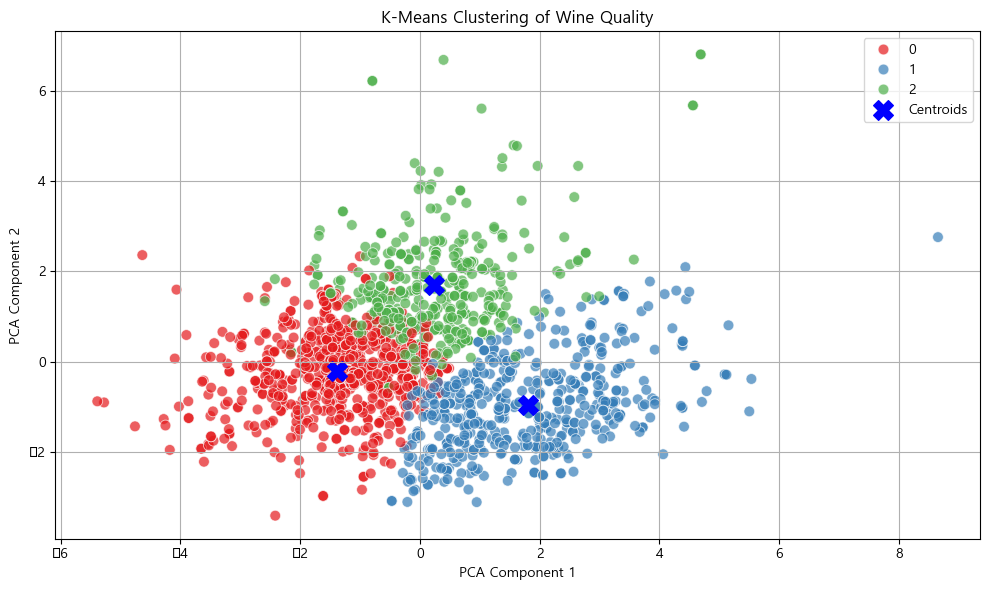

In [25]:
# PCA를 2차원으로 축소한 결과
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

# 클러스터 중심점도 PCA 공간에 투영
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# 시각화를 위한 DataFrame 구성
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# 시각화 시작
plt.figure(figsize=(10, 6))

# 클러스터별 점 표시
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set1',
    alpha=0.7,
    s=60
)

# 클러스터 중심점 표시
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c='blue', s=200, marker='X', label='Centroids'
)

# 제목 및 축 설정
plt.title("K-Means Clustering of Wine Quality")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---
### 비지도 학습 2 - 신용카드 거래
- 라벨을 가리고 (Isolation Fores vs DBSCAN)
- 이상치 탐지에 관한 학습 복습
- Class가 1이면 부정거래, Class가 0이면 정상
> 이상치 탐지 하는 모델


In [26]:
df_1 = pd.read_csv('creditcard.csv')

df_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
# 'Class' 열 기준으로 각 클래스의 개수 세기
class_counts = df_1['Class'].value_counts()

# 클래스별 개수 출력
print("클래스별 개수:\n", class_counts)

# 비율(%) 계산
class_ratio = df_1['Class'].value_counts(normalize=True) * 100
print("\n클래스별 비율(%):\n", class_ratio.round(3))

## -> 극단적으로 불균형 데이터, 이상치 탐지에 적합

클래스별 개수:
 Class
0    284315
1       492
Name: count, dtype: int64

클래스별 비율(%):
 Class
0    99.827
1     0.173
Name: proportion, dtype: float64


In [29]:
# 라벨 분리
X = df_1.drop(columns=["Class"])
y = df_1["Class"] # 실제 정답. 학습에는 사용하지 않는다.

In [30]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [31]:
from sklearn.preprocessing import StandardScaler

X['Amount'] = np.log1p(X['Amount'])
X['Time'] = StandardScaler().fit_transform(X[['Time']])

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

# Isolation Forest
iso_model = IsolationForest(n_estimators=100, contamination=0.002, random_state=42)

In [33]:
import numpy as np
# iso 학습
iso_pred = iso_model.fit_predict(X_scaled)

iso_labels = np.where(iso_pred == -1, 1, 0)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

# iso_labels: -1 (이상치), 1 (정상)
# Class: 1 (사기), 0 (정상)

# 실제 라벨
true_labels = df_1['Class']

# 혼동 행렬 및 성능 평가
print("📌 Isolation Forest 성능 평가")
print(confusion_matrix(true_labels, iso_labels))
print(classification_report(true_labels, iso_labels, digits=4))


📌 Isolation Forest 성능 평가
[[283898    417]
 [   339    153]]
              precision    recall  f1-score   support

           0     0.9988    0.9985    0.9987    284315
           1     0.2684    0.3110    0.2881       492

    accuracy                         0.9973    284807
   macro avg     0.6336    0.6548    0.6434    284807
weighted avg     0.9975    0.9973    0.9974    284807



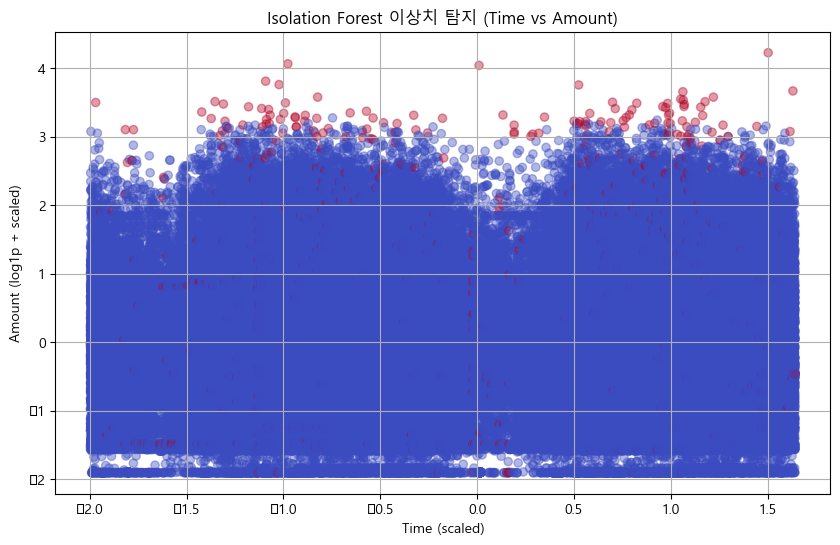

In [40]:
import matplotlib.pyplot as plt

# 전처리된 컬럼에서 다시 추출 (원본이 아닌 스케일링 후)
time_scaled = X_scaled[:, X.columns.get_loc("Time")]
amount_scaled = X_scaled[:, X.columns.get_loc("Amount")]

plt.figure(figsize=(10, 6))
plt.scatter(time_scaled, amount_scaled, 
            c=iso_labels, cmap='coolwarm', alpha=0.4)

plt.title("Isolation Forest 이상치 탐지 (Time vs Amount)")
plt.xlabel("Time (scaled)")
plt.ylabel("Amount (log1p + scaled)")
plt.grid(True)
plt.show()


- 왜인지는 모르겠지만. 전혀 부정 거래를 탐지하지 못하고 있다.

In [57]:
df_2 = pd.read_csv('creditcard.csv')

In [58]:
print(df_2['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [59]:
df_2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [60]:
# 데이터 전처리

from sklearn.preprocessing import StandardScaler

X['Amount'] = np.log1p(X['Amount'])
X['Time'] = StandardScaler().fit_transform(X[['Time']])

# 타겟 분리
X = df_2.drop(columns=['Class'])
y = df_2['Class']


# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 우선 차원축소를 하지않고 결과 확인. ->  매우 처참한 결과 확인 ㅋㅋㅋ
# [[ 74837 209478]
#  [     4    488]]
#               precision    recall  f1-score   support

#            0     0.9999    0.2632    0.4167    284315
#            1     0.0023    0.9919    0.0046       492

#     accuracy                         0.2645    284807
#    macro avg     0.5011    0.6275    0.2107    284807
# weighted avg     0.9982    0.2645    0.4160    284807

# 왜 그럴까? # -> 데이터가 너무 불균형해서 그런 것 같다. + 거리기반이어서 고차원 (30차원 정도) 에서는 잘 안된다고 한다 학습이.

# 30 -> 10차원으로 축소 한 뒤 결과

X_pca = PCA(n_components=10).fit_transform(X_scaled)

In [ ]:
# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=2.0, min_samples=30)  # eps와 min_samples는 실험적으로 조정 가능
labels = dbscan.fit_predict(X_pca)     

# labels = dbscan.fit_predict(X_scaled)     # 우선 차원 축소 없이 결과 확인
# 10차원으로 축소한 결과 -> 약 30분 걸림 
# [[277354   6961]
#  [    81    411]]
#               precision    recall  f1-score   support

#            0     0.9997    0.9755    0.9875    284315
#            1     0.0558    0.8354    0.1045       492

#     accuracy                         0.9753    284807
#    macro avg     0.5277    0.9054    0.5460    284807
# weighted avg     0.9981    0.9753    0.9859    284807

In [63]:
# 이상치이면 -1 → 1, 그 외는 0
y_pred = np.where(labels == -1, 1, 0)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print("📌 DBSCAN 이상치 탐지 성능 평가:")
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, digits=4))

📌 DBSCAN 이상치 탐지 성능 평가:
[[277354   6961]
 [    81    411]]
              precision    recall  f1-score   support

           0     0.9997    0.9755    0.9875    284315
           1     0.0558    0.8354    0.1045       492

    accuracy                         0.9753    284807
   macro avg     0.5277    0.9054    0.5460    284807
weighted avg     0.9981    0.9753    0.9859    284807



>  eps  와 min_samples에 따라 탐지 성능이 달라진다. 

- 차원수를 줄이니까 cpu보다 ram을 사용한다. -> (차원을 너무 줄이면)너무 데이터가 많아서 학습이 되지 않고 MemoryError 가 나온다 (RAM 과부하, 64GB 필요하다.)

e:\rookies\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


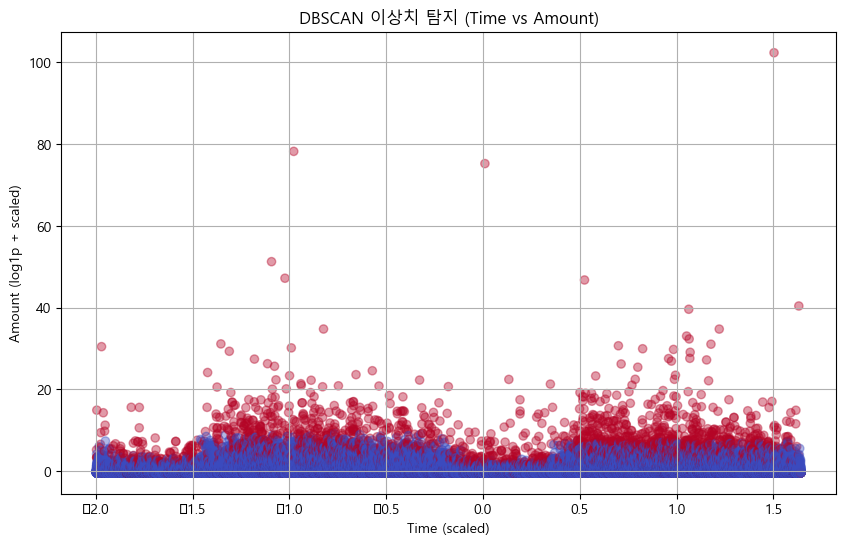

In [65]:
import matplotlib.pyplot as plt

# Time, Amount 열의 인덱스 파악
time_idx = X.columns.get_loc("Time")
amount_idx = X.columns.get_loc("Amount")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, time_idx], X_scaled[:, amount_idx],
            c=y_pred, cmap='coolwarm', alpha=0.4)
plt.title("DBSCAN 이상치 탐지 (Time vs Amount)")
plt.xlabel("Time (scaled)")
plt.ylabel("Amount (log1p + scaled)")
plt.grid(True)
plt.show()